# made by Aryan rathore (cse core student at vit bhopal)
# email :- Aryanrathore13572002@gmail.com
# linkedin :- https://www.linkedin.com/in/aryan-rathore-b15459215/
# github :- https://github.com/aryanrathore1012

# ___________________________________________________________________________________________

 # objective 
 <b>to divide the customers into groups so educated buissness decisions could be made</b>

# _________________________________________________________________________________________
# Index
<b>

1. Imports
2. Preliminary data analysis of Mail_Customers csv
3. Exploratory data analysis of Mail_Customers csv (now known as customer_data)
4. why we are only using the anumal income and spending score column
5. making the features dataframe with the annual income and spending score columns 
6. using the kmeans algorithm and deciding what number of cluster should we use based on elbow method and silhouette score
7. fitting our data into k_means_model and visualising the results
8. grabbing the final insights and defining the clusters in the data (conclusion)

</b>

# __________________________________________________________________________________________

# 1. Imports

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics

# __________________________________________________________________________________________
# 2. Preliminary data analysis of Mail_Customers csv

In [8]:
# download the csv posted on github and mention the path in this line

customer_data = pd.read_csv("F://aryans_code_notes//machine_learning//customer_segmentation//Mall_Customers.xls")

### checking if the Mail_Customers (customer_data) has:

0. first few values
1. general shape 
2. columns info
3. data distribution
4. has any missing values
5. handling the missing values
6. transforming the catagorical column

In [9]:
# 0. first few values

customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# 1. general shape 

customer_data.shape

(200, 5)

### we are dealing with a small dataset here of just 200 customers unlike my other projects

In [11]:
# 2. columns info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


in our data:

| # |  name | description |
|:---: | :------: | :--------------: | 
| 0.  |  CustomerID             |  Unique ID assigned to the customer                                         |                                 
| 1.  |  Gender                 |  Gender of the customer                                                     |     
| 2.  |  Age                    |  Age of the customer                                                        | 
| 3.  |  Annual Income (k$)     |  Annual Income of the customer in thousands                                 |
| 4.  |  Spending Score (1-100) |  Score assigned by the mall based on customer behavior and spending nature  |             

In [12]:
# 3. data distribution

customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* A) the avarage income of the customer in our dataset is 65,000 USD which is almost double than an avarage person from US :31,133 USD (2019)

* B) the age group we are dealing with is grown adult as the avrage age of customers accross the dataset is 38.8 (min: 13, max: 70) 

* C) i am asumming the higher someones spending score is the more they spend in the mall therefore by this logic, mostly everyone spends almost the same amount of money in the mall as the avarage is 50 with exceptions 

In [13]:
# 4. has any missing values 
# 5. handling the missing values

customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### the data has no missing values so there is no meaning in dealing with them either

In [49]:
# 6. transforming the catagorical column

# from 2 we know that gender has only 2 values male of female so we will transform this column

customer_data = customer_data.replace({"Gender": {"Male":0, "Female":1}})

### we really dont need the CustomerID column so we will just remove it from our dataset so after the preliminary data analysis this is what our dataset looks like

In [50]:
customer_data = customer_data.drop(columns="CustomerID")

In [51]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### all columns are now int64 so we can visualise them and perform exploratory data analysis on them

In [53]:
customer_data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# __________________________________________________________________________________________

# 3. Exploratory data analysis of Mail_Customers csv (now known as customer_data)

### lets see how male and female customers do we have

In [54]:
# temporarily cahnging the values back to normal in Gender for the sake of the graph

customer_data.replace({"Gender":{0:"Male", 1:"Female"}}, inplace=True)

fig = px.histogram(x="Gender",color="Gender", category_orders={"Gender": ["Male", "Female"]},  data_frame=customer_data)
plt.figure(figsize=(15,8))
fig.update_layout(bargap=0.2)
fig.show()

<Figure size 1080x576 with 0 Axes>

### the same data can be represented in this way as well

In [55]:
customer_data.replace({"Gender": {"Male":0, "Female":1}}, inplace=True)

data = list(customer_data["Gender"].value_counts())
labels = ["female", "male"]

plt.figure(figsize=(15,8))
fig = px.pie(values=data, names=labels, title='Ratio of male to female')
fig.show()

<Figure size 1080x576 with 0 Axes>

### we can see that our data data is a little biased towards females with 56 percent of the cutomers being female and rest 44 male

### lets look at the age range of customers :-


In [56]:
plt.figure(figsize=(15,8))
fig = px.histogram(customer_data, x="Age", nbins=(5))
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1080x576 with 0 Axes>

* The age range of 20-39 is the most common with almost 50 percent of the customers fall into this bin
* the 40-59 bin follows it with 64 customers 
* so our target customer base is young adults and middle aged people 

### lets check the anual income of the customers:-

In [57]:
plt.figure(figsize=(15,8))
fig = px.histogram(customer_data, x="Annual Income (k$)", nbins=7)
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1080x576 with 0 Axes>

* the most common range is 60,000 to 80,000 USD with 70 out of 200 cutomers in this range
* the 20-40, 40-60 ranges follow this range with 34 and 46 customers in this range respectively
* it would be good to keep the avarage income of 60,000 as baseline when taking future buissness descions

### lets check the distribution of Spending Score (1-100) in our dataset:-

In [58]:
plt.figure(figsize=(15,8))
fig = px.histogram(customer_data, x="Spending Score (1-100)", nbins=4)
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1080x576 with 0 Axes>

* the distribution of spending score is even with there being 2 groups of people 
* people with a score of less than 50 and people with a score of more than 50

this is the what the distribution looks like with more bins

In [59]:
plt.figure(figsize=(15,8))
fig = px.histogram(customer_data, x="Spending Score (1-100)", nbins=6)
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1080x576 with 0 Axes>

* we can see that most of the people have a spending score of 40-50 meaning people shop in bulk (monthly groceries) rather than 1-2 small items at a time 

### finnaly lets check what age range of people are the richest in the dataset

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

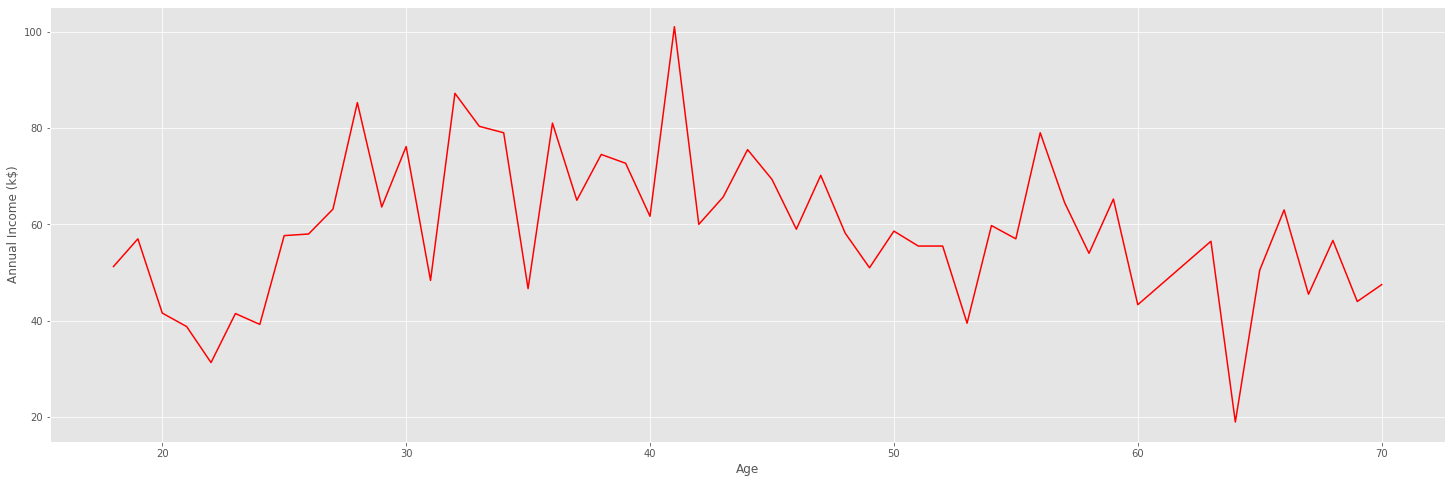

In [60]:
plt.figure(figsize=(25,8))
sns.lineplot(x=customer_data["Age"], y=customer_data["Annual Income (k$)"], markers= "o", errorbar=None, color='r')


* people with an age range of 30-40 are earing the most money in dataset so their needs should be prioritised more

### lets see what age group of people spend the most money

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

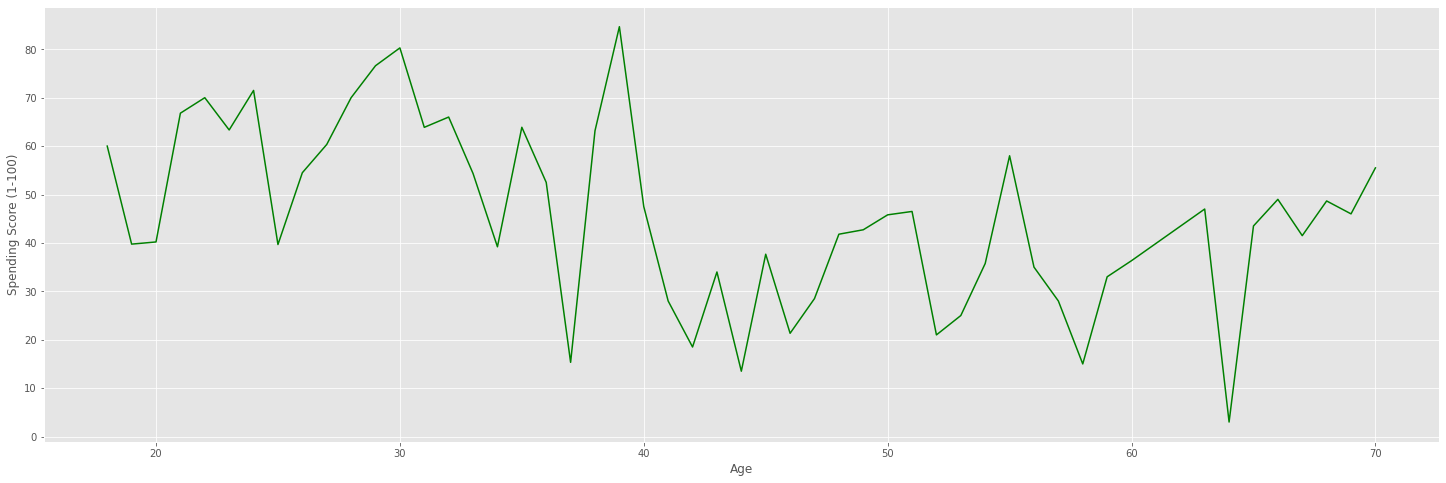

In [61]:
plt.figure(figsize=(25,8))
sns.lineplot(x=customer_data["Age"], y=customer_data["Spending Score (1-100)"], markers= "o", errorbar=None, color='g')

* there seem to be some spikes in the graph as people of age 21-25, 30-32, 39-40 spend the most money in the mall
* on the other hand people of ages 26-28, 37-38, 65 spend the least amount of money in the mall

In [62]:
# making 2 dataframes for male and female to see who spends more money and who earns more

# changing catagorical values back for the moment to better understand the data
customer_data.replace({"Gender":{0:"Male", 1:"Female"}}, inplace=True)

grouped_df = customer_data.groupby("Gender")

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")


     Gender  Age  Annual Income (k$)  Spending Score (1-100)
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
5    Female   22                  17                      76
6    Female   35                  18                       6
..      ...  ...                 ...                     ...
191  Female   32                 103                      69
193  Female   38                 113                      91
194  Female   47                 120                      16
195  Female   35                 120                      79
196  Female   45                 126                      28

[112 rows x 4 columns] 


    Gender  Age  Annual Income (k$)  Spending Score (1-100)
0     Male   19                  15                      39
1     Male   21                  15                      81
8     Male   64                  19                       3
1

In [63]:
# this code shows how much money each gender is making total 

money_earned_by_gender = grouped_df["Annual Income (k$)"].sum()
money_earned_by_gender

Gender
Female    6636
Male      5476
Name: Annual Income (k$), dtype: int64

In [64]:
spending_score_of_gender = grouped_df["Spending Score (1-100)"].sum()
spending_score_of_gender

Gender
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64

* in our dataset the female customers are earning more money than male customers
* and female customers are spending more money in the mall compared to the male customers

### the mall should target people of age range 30-40 (females) wants the most as they are earing more money and spending a lot of it in the mall
### this is it for all the explatory analysis of the customer_data now its time to fit the models in diffrent ml algorithms

# ______________________________________________________________________________________________________________________________

# 4. why we are only using the annual income and spending score column

* in this notebook we are trying to make groups and classify fit customers into these group
* therefore this is a clustering problem 
* so we will use unsupervised machine learning algorithms and tactics
* since there are no target variables we will be finding a meaningfull relation between the features
* therefore we will find the relation between the customers anual income and spending score and divide them using these 2 features

# ______________________________________________________________________________________________________________________________
# 5. making the features dataframe with the annual income and spending score columns 

In [14]:
# grabbing the 2 columns from our customer_data dataset

features = customer_data[["Annual Income (k$)","Spending Score (1-100)"]]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### lets start by making a general scatter plot between the 2 features

In [15]:
fig = px.scatter(features, x="Annual Income (k$)", y="Spending Score (1-100)", hover_data=features)
fig.show()

* cant grab much insights from this data 

# ______________________________________________________________________________________________________________________________
# 6. using the kmeans algorithm and deciding what number of cluster should we use based on elbow method and silhouette score

### we will the kmeans clustering algorithm 

taken from https://www.kaggle.com/code/lusfernandotorres/the-abcs-of-machine-learning-4-essential-models

<h1 id = 'kmeans'><div style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 24px;
            font-weight: bold;">K-Means</div></h1>
<br>
<p><img style="float:right; margin:20px; padding:20px; max-height:250px" src="https://cdn-icons-png.flaticon.com/512/1753/1753846.png"></p>
<div style="font-size: 16px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">the K-Means is  popular model that you have to know! It is an <b>unsupervised model</b> that is used for grouping similar data points together based on their features. It is a type of <b>clustering</b> algorithm that partitions a dataset into a predetermined number of clusters, where each cluster represents a group of data points that are similar in some way.
<br><br>
K-Means works by minimizing the distance between data points and their assigned cluster centroids. The algorithm starts by randomly selecting K centroids, where <b>K is the number of clusters desired</b>. Each data point is then assigned to the nearest centroid, and the centroid is updated to the mean of all the data points assigned to it. This process is repeated until the centroids no longer move significantly or a predetermined number of iterations has been reached.
<br><br>
K-Means is widely used in various fields such as data mining, image processing, and pattern recognition for identifying groups of similar data points, customer segmentation, and anomaly detection.
<br><br>
The goal of a K-Means ML model is to identify certain subsets of data that are both meaningful and useful for the task at hand. This is done by minimizing the sum of squared distances between each data point and its assigned centroid, which is also known as the Within-Cluster Sum of Squares (WCSS). <b>The optimal number of clusters is usually determined by visually inspecting the Elbow Curve</b>, which plots the WCSS against the number of clusters.
<br><br>
Once the optimal number of clusters has been determined, the K-Means model can be used to classify new data points into their respective clusters.
<br><br>
In the code lines below, you'll see a brief demonstration on how K-Means can be used for clustering on the <a href = "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python">Mall Customer Segmentation Dataset</a>.</div>

* The k-Means has a clusters parameter which asks how many clusters we need in our group
* to find the optimal number of cluster we need to find the wcss - (within clusters sum of squares)
* we will take number of clusters from 1 to 15 and see at which point the wcss decreases the least 
* this point would be our elbow point and we will choose this as the number of clusters


In [16]:
wcss_scores = []
for i in range(1, 16):
    k_means_model = KMeans(n_clusters=i, init="k-means++", random_state=0)
    k_means_model.fit(features.values)
    wcss_scores.append(k_means_model.inertia_)

wcss_scores
    

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124,
 17702.595932296277,
 15810.838613705502,
 14763.330402558204,
 13165.329070181626,
 12064.939000692291]

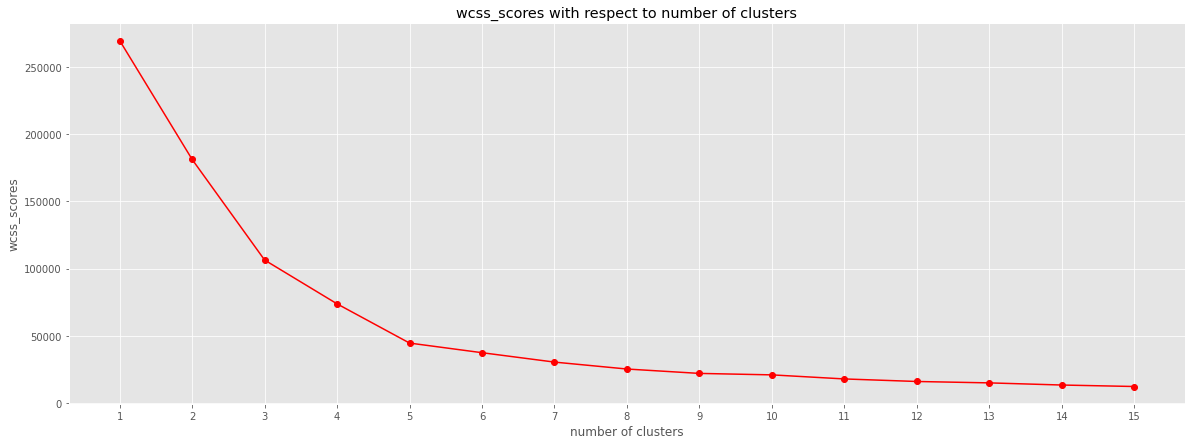

In [17]:
mpl.style.use(['ggplot'])
plt.figure(figsize=(20,7))
plt.plot(range(1,16), wcss_scores, color="red", marker="o")
plt.xticks(range(1,16))
plt.xlabel("number of clusters")
plt.ylabel("wcss_scores")
plt.title("wcss_scores with respect to number of clusters")
plt.show()

* we can clearly see that after 5 clusters there is no signifcant drop in the wcss_score which makes it the elbow point, 6 is a good candidate as 
well
* we will need to check which number of clusters in better 5 or 6 so lets use silhoutte scores

In [18]:


sil_scores = []
for i in range(2, 16):
    k_means_model = KMeans(n_clusters=i, init="k-means++", random_state=42).fit(features)
    labels = k_means_model.labels_
    sil_scores.append(metrics.silhouette_score(features, labels, metric="euclidean"))

print(sil_scores)

[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5264283703685728, 0.45827056882053113, 0.4553729779390266, 0.45925273534781125, 0.43844724497454024, 0.4355277383491917, 0.4116158062845966, 0.420038864189063, 0.42511883494440655]


* lets visualize the above values

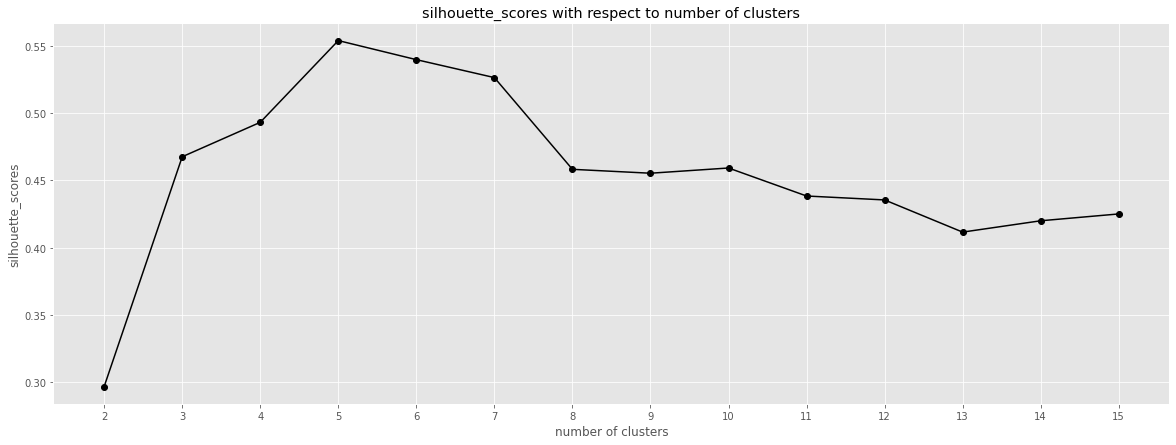

In [22]:
mpl.style.use(['ggplot'])
plt.figure(figsize=(20,7))
plt.plot(range(2,16), sil_scores, color="black", marker="o")
plt.xticks(range(2,16))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_scores")
plt.title("silhouette_scores with respect to number of clusters")
plt.show()

* the silhouette score peaks at 5 clusters then droops at 6 which means 5 is the best number of clusters we can get 
* now we will train the kmeans model using 5 clusted and init = "k-means++"

# ______________________________________________________________________________________________________________________________
# 7. fitting our data into k_means_model and visualising the results

In [23]:
k_means_model = KMeans(n_clusters=5, init="k-means++", random_state=0)
prediction = k_means_model.fit_predict(features.values)
print(prediction)
print("\n number of points classified: ", len(prediction))

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

 number of points classified:  200


* our classifier has made 5 clusters and classified all 200 points into these 5 clusters 
* now lets visualise the above result

In [24]:
# you can just use the dataframe as scatter uses a 2d list 
# therefore using x for values of the dataframe
x = features.values
print(x[0:5]) # anual income, spending score of the first 5 rows

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


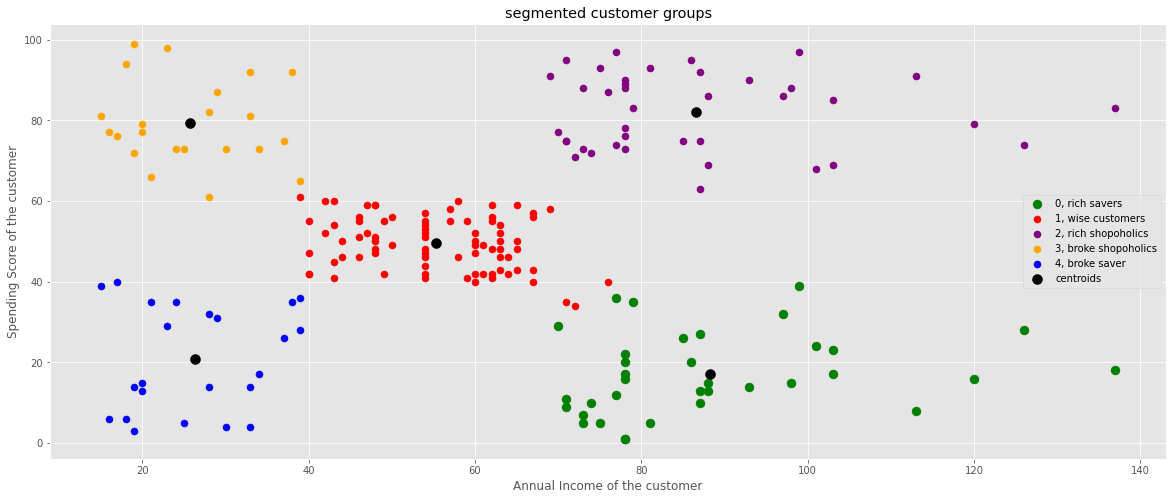

In [25]:
# PLOTTING the clusters with their centroids

plt.figure(figsize=(20, 8))

plt.scatter(x[prediction==0,0], x[prediction==0,1], s=80, c="green", label='0, rich savers')
plt.scatter(x[prediction==1,0], x[prediction==1,1], s=50, c="red", label='1, wise customers')
plt.scatter(x[prediction==2,0], x[prediction==2,1], s=50, c="purple", label='2, rich shopoholics')
plt.scatter(x[prediction==3,0], x[prediction==3,1], s=50, c="orange", label='3, broke shopoholics')
plt.scatter(x[prediction==4,0], x[prediction==4,1], s=50, c="blue", label='4, broke saver')

# plotting the centroids
plt.scatter(k_means_model.cluster_centers_[:,0], k_means_model.cluster_centers_[:,1], s=100, c="black", label="centroids")

plt.title('segmented customer groups')
plt.xlabel('Annual Income of the customer')
plt.ylabel('Spending Score of the customer')
plt.legend()
plt.show()


# ______________________________________________________________________________________________________________________________
# 8. grabbing the final insights and defining the clusters in the data (conclusion)

### and here it is the final output of the kmeans model

<!-- plt.scatter(x[prediction==0,0], x[prediction==0,1], s=80, c="green", label='cluster 0')
plt.scatter(x[prediction==1,0], x[prediction==1,1], s=50, c="red", label='cluster 1')
plt.scatter(x[prediction==2,0], x[prediction==2,1], s=50, c="purple", label='cluster 2')
plt.scatter(x[prediction==3,0], x[prediction==3,1], s=50, c="orange", label='cluster 3')
plt.scatter(x[prediction==4,0], x[prediction==4,1], s=50, c="blue", label='cluster 4') -->

* the customers are seprated into 5 clusters:-

* cluster 0 - green - "rich savers" - these customers have an AI of greater than 70k and but an SS of 0-40 (they hoard their money)
* cluster 1 - red - "wise customers" - these customers have an anual income (AI) of 40k - 80k and a spending score (SS) of 35-65 (wise)
* cluster 2 - purple - "rich shopoholics" - these customers have an AI of greater than 70k and an SS of 60-100 (the ideal customers of the mall)
* cluster 3 - orange - "broke shopoholics" - these customers have an AI of 0-40k but an SS of 60-100 (they are broke but spend a lot money)
* cluster 4 - blue - "broke savers" - these customers have an AI of 0-40k and SS of 0-40 (they dont earn as much and are not intrested)

### groups in order of anual income (AI): (^ is greater than)

* cluster 4 - blue - "broke saver" 
* cluster 3 - orange - "broke shopoholics" 
*                ^
* cluster 1 - red - "wise customers" 
*                ^
* cluster 0 - green - "rich savers" 
* cluster 2 - purple - "rich shopoholics"

### groups in order of spending score (SS):

* cluster 4 - blue - "broke saver" 
* cluster 0 - green - "rich savers" 
*                ^
* cluster 1 - red - "wise customers" 
*                ^
* cluster 3 - orange - "broke shopoholics" 
* cluster 2 - purple - "rich shopoholics"

In [26]:
prediction = k_means_model.predict([[150,100]]) # should be a rich shopoholic - purple - cluster2

print("The person belongs to cluster : ", prediction[0])

The person belongs to cluster :  2
